<a href="https://colab.research.google.com/github/veapasichnyk/HomeWorksDataLovesAcademy/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

##Метод МНК

In [3]:
# Знаходимо значення 𝜃, які мінімізують функцію втрат 𝐿
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [4]:
# Отримуємо numpy-масиви (наші дані)
X = non_smoker_df[['age']].values
y = non_smoker_df['charges'].values

In [5]:
# Додаємо колонку одиничок аби задачи bias терм (константу в моделі регресії)
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

In [6]:
MNK_coefs = normal_equations(X_with_intercept, y)

In [7]:
MNK_coefs

array([-2091.42055657,   267.24891283])

In [8]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

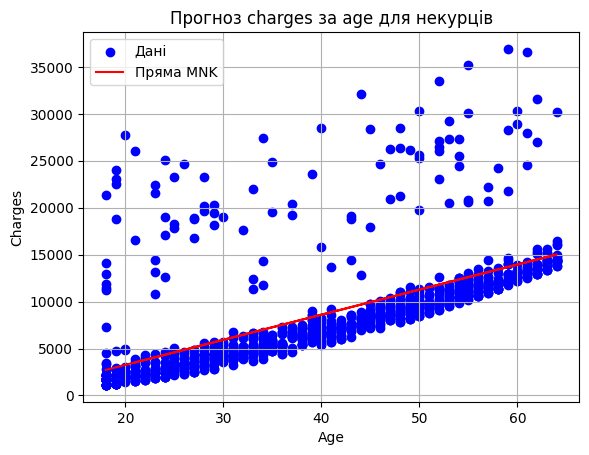

In [9]:
# Побудова графіка
plt.scatter(X, y, color='blue', label='Дані')
plt.plot(X, predictions_MNK, color='red', label='Пряма MNK')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Прогноз charges за age для некурців')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
#Точність прогнозу RMSE
mse_mnk = mean_squared_error(y, predictions_MNK)  #MSE
rmse_mnk = np.sqrt(mse_mnk) #RMSE

print(f"Точність прогнозу RMSE: {rmse_mnk}")

Точність прогнозу RMSE: 4662.505766636395


##Full-Batch градієнтний спуск

In [11]:
# Отримуємо наші дані
X = non_smoker_df['age'].to_numpy().reshape(-1, 1)  # двовимірний масив

In [12]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.01, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [13]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=1000)
predictions_fbgd = m * X[:, 0] + b

m, b

(np.float64(221.1045843794301), np.float64(-41.98126853149978))

In [14]:
predictions_fbgd

array([3937.9012503 , 6148.94709409, 7254.47001599, ..., 3937.9012503 ,
       3937.9012503 , 4601.21500344])

In [15]:
m1, b1, errors1 = full_batch_gradient_descent(X, y, lr=0.00001, epochs=10000)
predictions_fbgd1 = m1 * X[:, 0] + b1

m1, b1

(np.float64(221.10457373276387), np.float64(-41.980795673907885))

In [16]:
predictions_fbgd1

array([3937.90153152, 6148.94726884, 7254.47013751, ..., 3937.90153152,
       3937.90153152, 4601.21525271])

In [17]:
m2, b2, errors2 = full_batch_gradient_descent(X, y, lr=0.000001, epochs=10000)
predictions_fbgd2 = m2 * X[:, 0] + b2

m2, b2

(np.float64(220.15455540263423), np.float64(0.21301135385474854))

In [18]:
predictions_fbgd2

array([3962.9950086 , 6164.54056263, 7265.31333964, ..., 3962.9950086 ,
       3962.9950086 , 4623.45867481])

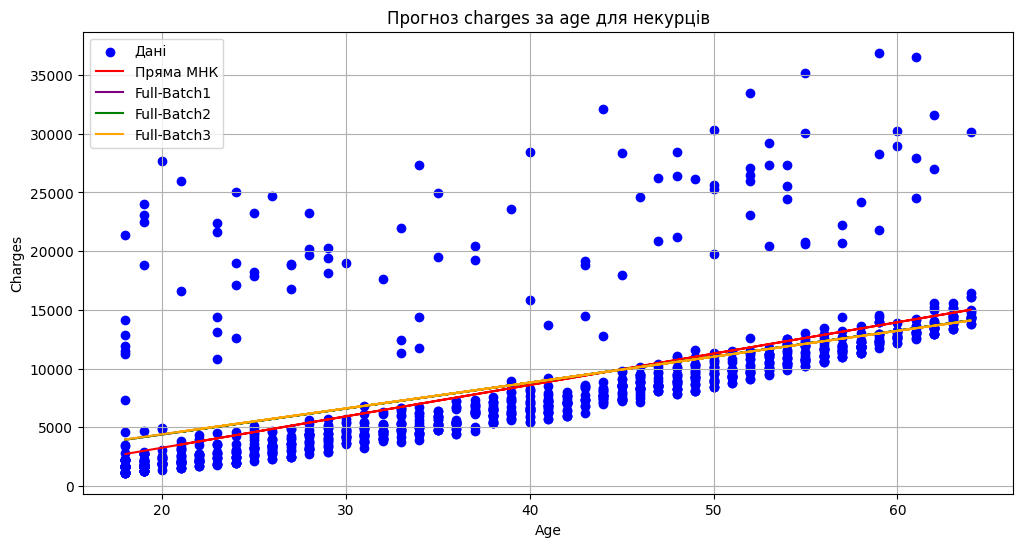

In [19]:
# Побудова графіка
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Дані')
plt.plot(X[:, 0], predictions_MNK, color='red', label='Пряма МНК')
plt.plot(X[:, 0], predictions_fbgd, color='purple', label='Full-Batch1')
plt.plot(X[:, 0], predictions_fbgd1, color='green', label='Full-Batch2')
plt.plot(X[:, 0], predictions_fbgd2, color='orange', label='Full-Batch3')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Прогноз charges за age для некурців')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
#Точність прогнозу RMSE
mse_fbgd = mean_squared_error(y, predictions_fbgd)  # MSE
rmse_fbgd = np.sqrt(mse_fbgd)  # RMSE з MSE

print(f"Точність прогнозу RMSE, якщо lr=0.0001: {rmse_fbgd}")



Точність прогнозу RMSE, якщо lr=0.0001: 4713.250582815521


In [21]:
#Точність прогнозу RMSE
mse_fbgd = mean_squared_error(y, predictions_fbgd1)  # MSE
rmse_fbgd = np.sqrt(mse_fbgd)  # RMSE з MSE

print(f"Точність прогнозу RMSE, якщо lr=0.00001: {rmse_fbgd}")

Точність прогнозу RMSE, якщо lr=0.00001: 4713.2506061057


In [22]:
#Точність прогнозу RMSE
mse_fbgd = mean_squared_error(y, predictions_fbgd2)  # MSE
rmse_fbgd = np.sqrt(mse_fbgd)  # RMSE з MSE

print(f"Точність прогнозу RMSE, якщо lr=0.000001: {rmse_fbgd}")

Точність прогнозу RMSE, якщо lr=0.000001: 4715.3497503703065


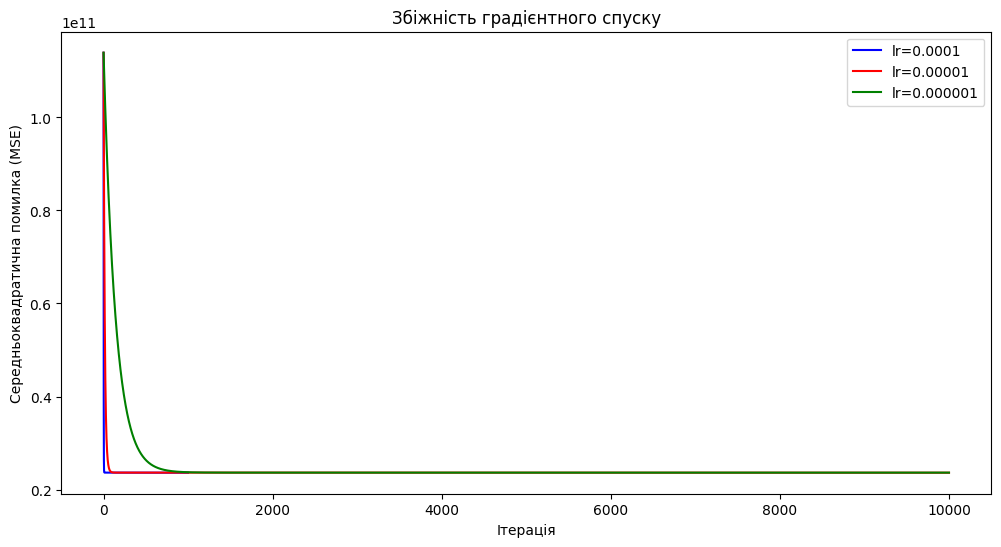

In [23]:
# Графік помилки в залежності від кількості ітерацій
plt.figure(figsize=(12, 6))
plt.plot(errors, color='blue', label='lr=0.0001')
plt.plot(errors1, color='red', label='lr=0.00001')
plt.plot(errors2, color='green', label='lr=0.000001')
plt.xlabel('Ітерація')
plt.ylabel('Середньоквадратична помилка (MSE)')
plt.title('Збіжність градієнтного спуску')
plt.legend()
plt.show()

Найкращий learning rate — той, при якому:

*  крива MSE зменшується швидко,

*  не "стрибає",

*  досягає меншого значення помилки за менше число ітерацій.

У нашому випадку крива MSE досягає меншого значення помилки за менше число ітерацій при lr= 0.0001, також ми бачимо що і RMSE = 4713.250582815521 є найменшим значенням.

##Scikit-learn LinearRegression

In [24]:
# Вибір X
X = non_smoker_df['age'].to_frame()  # двовимірний масив

In [25]:
# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [26]:
lin_reg.coef_[0], lin_reg.intercept_

(np.float64(267.2489128311997), np.float64(-2091.4205565650864))

In [27]:
predictions_sklearn = lin_reg.predict(X)

In [28]:
mse_lin_reg = mean_squared_error(y, predictions_sklearn)  # MSE
rmse_lin_reg = np.sqrt(mse_lin_reg)  # RMSE з MSE

print(f"Точність прогнозу RMSE: {rmse_lin_reg}")

Точність прогнозу RMSE: 4662.505766636395


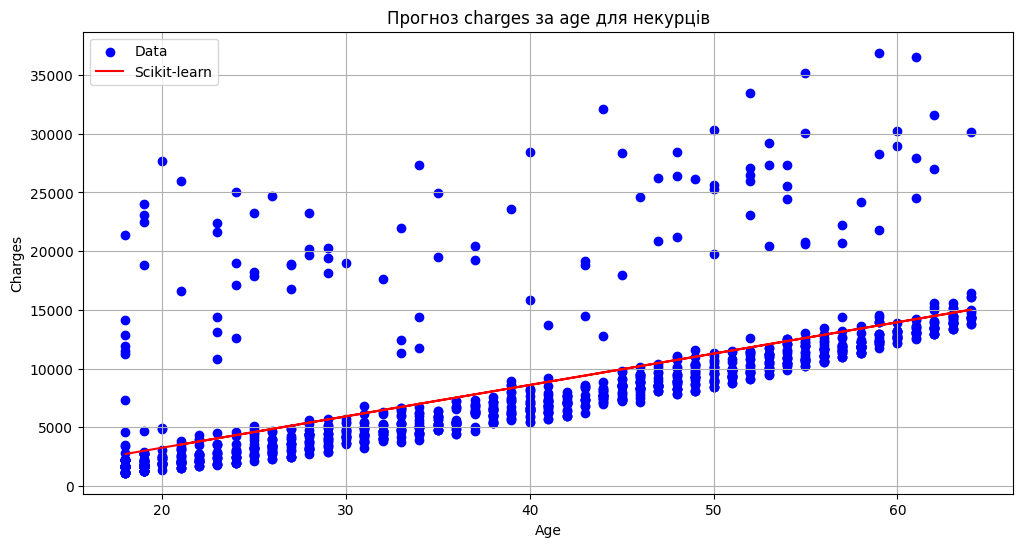

In [29]:
# Побудова графіка
plt.figure(figsize=(12, 6))
plt.scatter(X["age"], y, color='blue', label='Data')
plt.plot(X["age"], predictions_sklearn, color='red', label='Scikit-learn')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Прогноз charges за age для некурців')
plt.legend()
plt.grid(True)
plt.show()

##Всі три лінії регресії

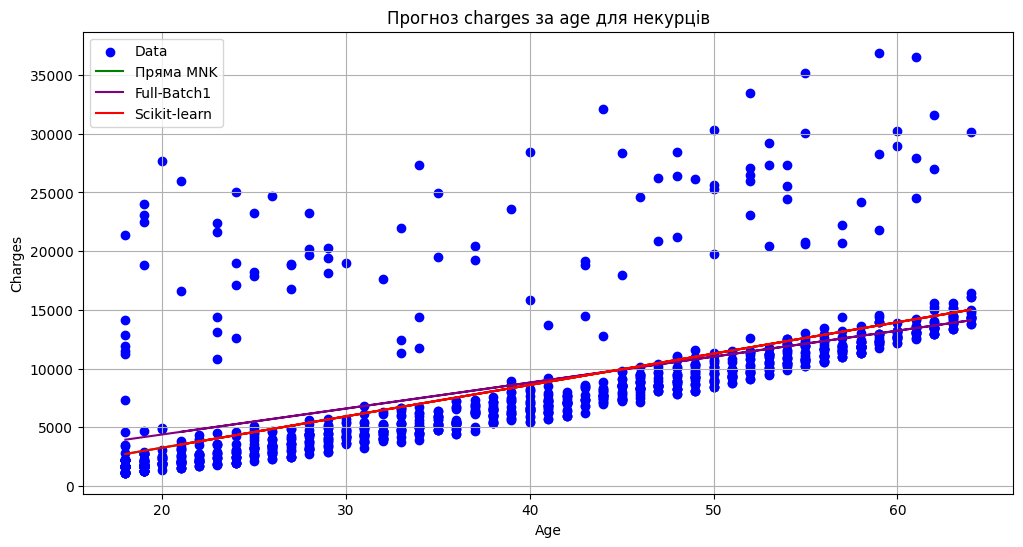

In [30]:
# Побудова графіка
plt.figure(figsize=(12, 6))
plt.scatter(X["age"], y, color='blue', label='Data')
plt.plot(X, predictions_MNK, color='green', label='Пряма MNK')
plt.plot(X, predictions_fbgd, color='purple', label='Full-Batch1')
plt.plot(X["age"], predictions_sklearn, color='red', label='Scikit-learn')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Прогноз charges за age для некурців')
plt.legend()
plt.grid(True)
plt.show()

Як і очікувалося пряма MNK та пряма Scikit-learn співпали (так як sklearn використовує MNK) і вони ж показали найкращі результати RMSE = 4662.505766636395 в порівнянні з отриманою для full-batch градієнтного спуску  RMSE = 4713.250582815521.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [31]:
# Фільтруємо курців
smoker_df = medical_df[medical_df['smoker'] == 'yes']

In [32]:
# Змінні
X = smoker_df[['age']]  # ознака (матриця)
y = smoker_df['charges']

In [33]:
# Модель
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [34]:
#Коефіцієнт та вільний член
model.coef_[0], model.intercept_

(np.float64(305.2376021098288), np.float64(20294.128126915966))

In [35]:
# Передбачення
predictions = model.predict(X)

In [36]:
# Оцінка
mse_lin_reg = mean_squared_error(y, predictions)  # MSE
rmse_lin_reg = np.sqrt(mse_lin_reg)  # RMSE з MSE

print(f"Точність прогнозу RMSE: {rmse_lin_reg}")


Точність прогнозу RMSE: 10711.00334810241


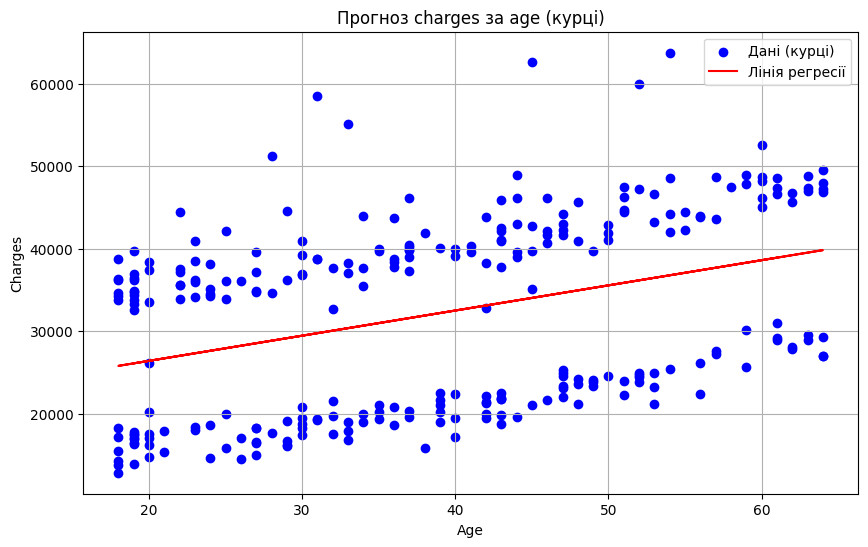

In [37]:
#Побудова графіка
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Дані (курці)')
plt.plot(X, predictions, color='red', label='Лінія регресії')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Прогноз charges за age (курці)')
plt.legend()
plt.grid(True)
plt.show()

RMSE ≈ 10 711 — це доволі велика помилка, тому модель не є хорошою для точного прогнозування charges у курців.

Модель погано підходить для практичного використання в компанії, якщо вона базується лише на age — занадто висока помилка.